In [2]:
import pandas as pd 
import matplotlib.pyplot as plt     
import seaborn as sns

In [5]:
df =pd.read_csv('../data/cleaned/Books_Data_cleaned.csv')

In [6]:
df.head()

,index,publishing_year,book_name,author,language_code,author_rating,book_average_rating,book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,publisher,units_sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [7]:
df.describe

<bound method NDFrame.describe of       index  publishing_year                        book_name  \
0         0           1975.0                          Beowulf   
1         1           1987.0                 Batman: Year One   
2         2           2015.0                Go Set a Watchman   
3         3           2008.0  When You Are Engulfed in Flames   
4         4           2011.0         Daughter of Smoke & Bone   
...     ...              ...                              ...   
1065   1065           2014.0                    Gray Mountain   
1066   1066           1989.0                 The Power of One   
1067   1067           1930.0               The Maltese Falcon   
1068   1068           2011.0                       Night Road   
1069   1069           1999.0                         Tripwire   

                                                 author language_code  \
0                                Unknown, Seamus Heaney         en-US   
1     Frank Miller, David Mazzucchelli,

In [8]:
df.describe()

,index,publishing_year,book_average_rating,book_ratings_count,gross_sales,publisher_revenue,sale_price,sales_rank,units_sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [12]:
df=df[df['publishing_year']>1900]

In [16]:
df.isna().sum() 

index                   0
publishing_year         0
book_name               0
author                  0
language_code          47
author_rating           0
book_average_rating     0
book_ratings_count      0
genre                   0
gross_sales             0
publisher_revenue       0
sale_price              0
sales_rank              0
publisher               0
units_sold              0
dtype: int64

In [15]:
df.dropna(subset="book_name",inplace=True)

C:\Users\Gaurav Dogra\AppData\Local\Temp\ipykernel_8928\3169436014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset="book_name",inplace=True)


In [17]:
df.duplicated().sum()   

np.int64(0)

In [18]:
df.nunique()

index                  988
publishing_year        101
book_name              987
author                 669
language_code            8
author_rating            4
book_average_rating    133
book_ratings_count     983
genre                    4
gross_sales            774
publisher_revenue      570
sale_price             143
sales_rank             818
publisher                9
units_sold             470
dtype: int64

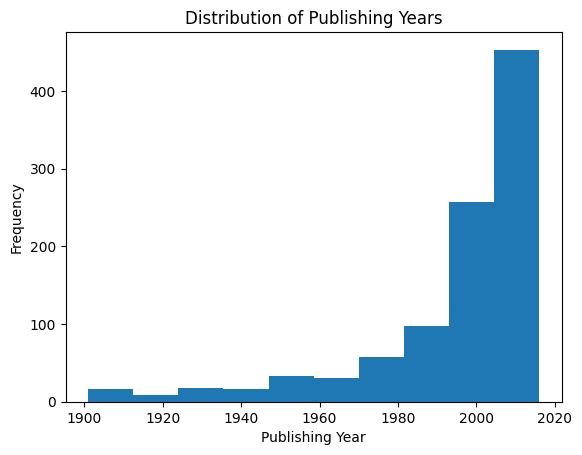

In [21]:
plt.hist(df["publishing_year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Years")
plt.show()

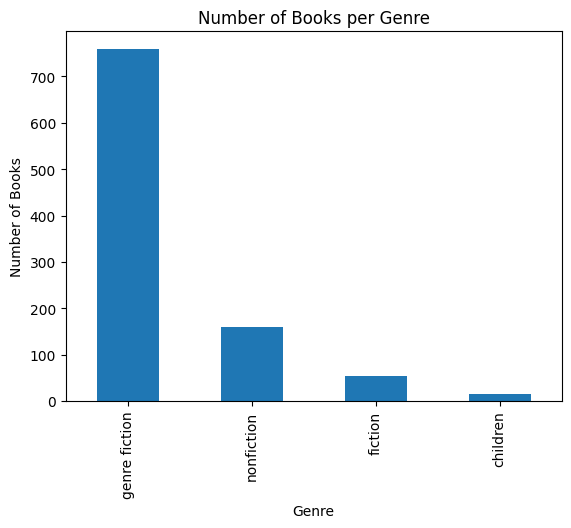

In [22]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books per Genre")
plt.show()

In [25]:
df.groupby("author")["book_average_rating"].mean().sort_values(ascending=False)


author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: book_average_rating, Length: 669, dtype: float64

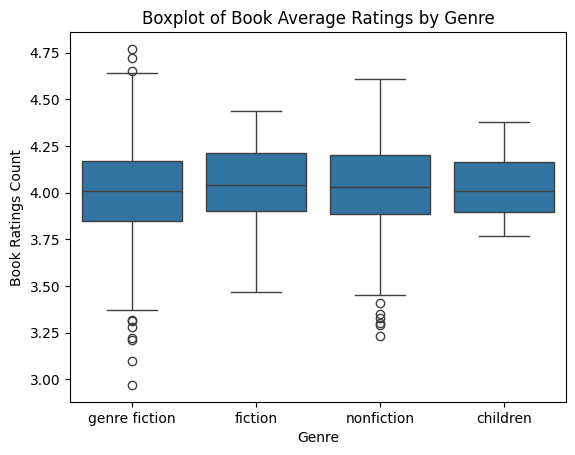

In [27]:
sns.boxplot(x='genre', y='book_average_rating', data=df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Boxplot of Book Average Ratings by Genre")
plt.show()

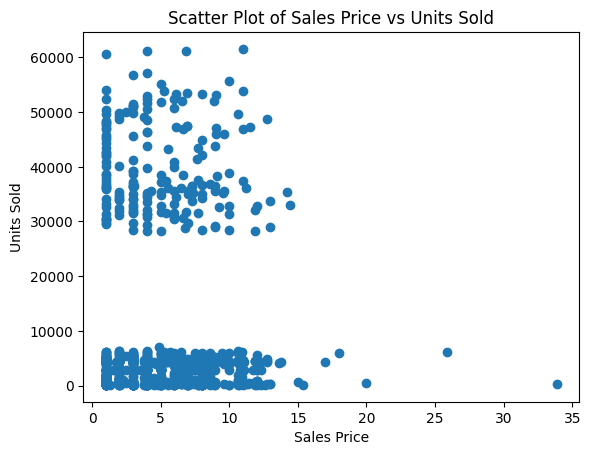

In [29]:
plt.scatter(df["sale_price"],df["units_sold"])
plt.xlabel("Sales Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sales Price vs Units Sold")
plt.show()

In [30]:
language_counts=df["language_code"].value_counts() 

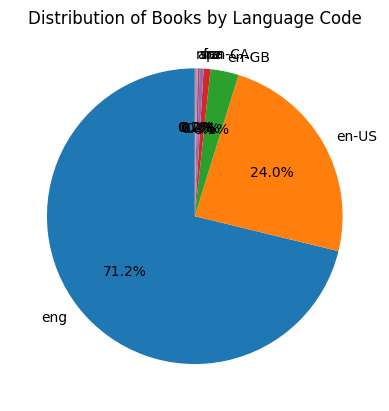

In [31]:
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Books by Language Code")
plt.show()

In [32]:
df.groupby("publisher")["publisher_revenue"].sum().sort_values(ascending=False)

publisher
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher_revenue, dtype: float64

In [38]:
df.groupby("author_rating")["book_ratings_count"] \
  .mean() \
  .sort_values(ascending=False) \
  .max()


np.float64(101400.27256944444)

In [39]:
df.groupby("language_code").size().sort_values(ascending=False) 

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [42]:
df.groupby("author_rating")["book_ratings_count"].var()

author_rating
Excellent       4.419857e+08
Famous          1.227555e+09
Intermediate    1.170331e+09
Novice          9.523157e+08
Name: book_ratings_count, dtype: float64

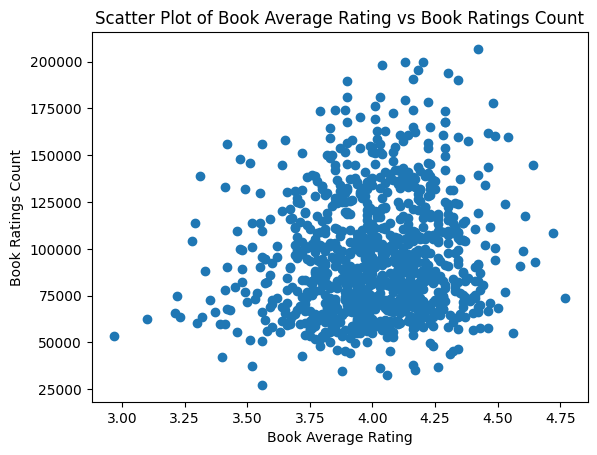

In [43]:
plt.scatter(df["book_average_rating"],df["book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")    
plt.title("Scatter Plot of Book Average Rating vs Book Ratings Count")
plt.show()  

In [44]:
total_gross_sales_by_author=df.groupby("author")["gross_sales"].sum()

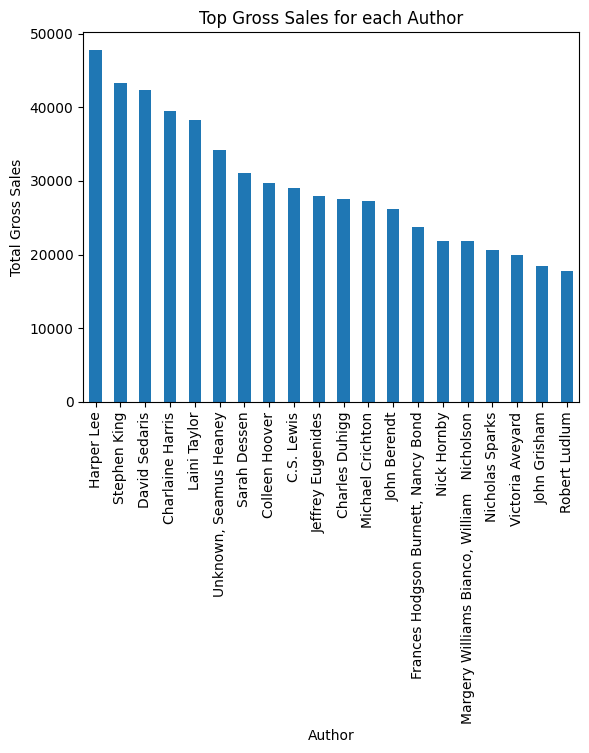

In [46]:
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Top Gross Sales for each Author")
plt.show()  

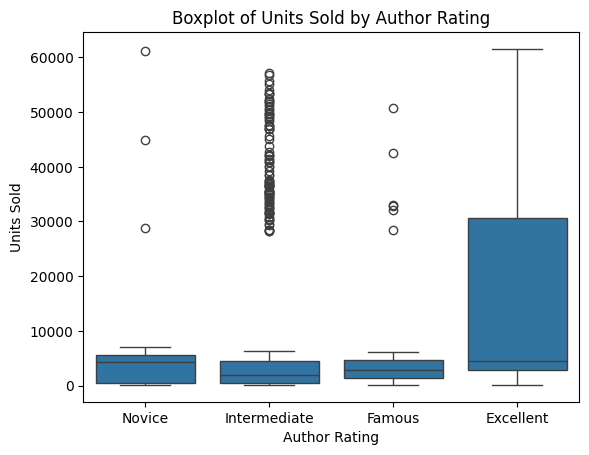

In [47]:
sns.boxplot(x="author_rating", y="units_sold", data=df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Boxplot of Units Sold by Author Rating")
plt.show()  

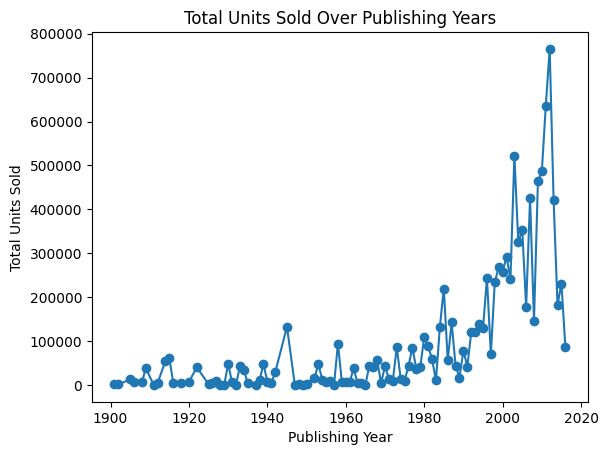

In [48]:
df.groupby("publishing_year")["units_sold"].sum().plot(kind='line' , marker='o') 
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over Publishing Years")
plt.show()  